# Geocoding

Geocoding ist das Herausfinden, welcher Ort (also, Koordinaten) zu einem Ort gehören.

Beispiel: ich habe ein Stück Text und möchte herausfinden, was dessen Koordinaten sein könnten.
  * Ortschaft: `Romanshorn`
  * Lokalität: `Kreis 4, Zürich`
  * Adresse: `Bundesplatz 1, 3000 Bern`
  * Geschäft: `Melectronics, Amriville`

Oft können die Text mehrdeutig sein, dann muss Geocoding die wahrscheinlichsten Koordinaten zuordnen. Je nachdem kann der Kontext dabei helfen:
  * `Moskau` heisst aus planetarischer Perspektive wahrscheinlich die Hauptstadt Russlands: https://www.openstreetmap.org/search?query=Moskau
  * `Moskau`, wenn ich auf der Karte bereits den Kanton Schaffhausen herangezoomt habe, heisst wahrscheinlich ein Kaff nördlich des Rheins: https://www.openstreetmap.org/node/3649482118

Unten benutzen wir einen Geocoding Service auf dem Netz, um ein paar Daten zu Geocoden.

In [1]:
import pandas as pd

source = 'https://data.tg.ch/api/explore/v2.1/catalog/datasets/div-energie-10/exports/csv'

# CSV-Daten mit Pandas lesen.
# Achtung: wir verwenden Semikolons statt Kommas als Trennzeichen.
# header=0 teilt der Funktion mit, dass wir Spaltenheader in der Datei erwarten.
energy_dataset = pd.read_table(source, sep=';', header=0)
# Wie sehen die Daten aus?
energy_dataset

,jahr,bfs_nr_gemeinde,gemeinde_name,einwohner,wasserkraft,biomasse_holz,biogasanlagen_landwirtschaft,kehricht,biogasanlagen_industrie,biogasanlagen_abwasser,photovoltaik,wind,total
0,2020,4881,Amlikon-Bissegg,1329,NaN,NaN,3.894,NaN,NaN,NaN,4.366,NaN,8.260
1,2020,4461,Amriswil,14157,NaN,NaN,NaN,NaN,NaN,NaN,5.061,NaN,5.061
2,2020,4891,Berg (TG),3420,NaN,NaN,0.730,NaN,NaN,NaN,2.475,0.005,3.210
3,2020,4901,Birwinken,1330,NaN,NaN,NaN,NaN,NaN,NaN,0.971,NaN,0.971
4,2020,4471,Bischofszell,5878,2.813,NaN,NaN,NaN,NaN,1.336,2.102,NaN,6.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2015,4871,Wagenhausen,1672,NaN,NaN,NaN,NaN,NaN,NaN,0.259,NaN,0.259
476,2015,4946,Weinfelden,11147,8.266,NaN,NaN,39.873,NaN,0.474,2.011,NaN,50.624
477,2015,4951,Wigoltingen,2369,NaN,NaN,0.398,NaN,NaN,NaN,1.254,NaN,1.652
478,2015,4791,Wuppenau,1120,NaN,NaN,NaN,NaN,NaN,NaN,0.720,NaN,0.720


Aha, die Gemeindenamen sind in der Spalte `gemeinde_name`.

In [2]:
import geopandas, geopandas.tools.geocoding

# Geocode the `gemeinde_name` field
gemeinde_locations = geopandas.tools.geocode(energy_dataset.gemeinde_name)

In [16]:
import pandas as pd
import geopandas as gpd

# Concatenate the geocoding information along axis 1 (add columns)
geocoded = pd.concat([energy_dataset, gemeinde_locations], axis=1)
geocoded = gpd.GeoDataFrame(geocoded)
geocoded

,jahr,bfs_nr_gemeinde,gemeinde_name,einwohner,wasserkraft,biomasse_holz,biogasanlagen_landwirtschaft,kehricht,biogasanlagen_industrie,biogasanlagen_abwasser,photovoltaik,wind,total,geometry,address
0,2020,4881,Amlikon-Bissegg,1329,NaN,NaN,3.894,NaN,NaN,NaN,4.366,NaN,8.260,POINT (9.04021 47.56192),"Amlikon-Bissegg, 8514, Thurgau, Schweiz/Suisse..."
1,2020,4461,Amriswil,14157,NaN,NaN,NaN,NaN,NaN,NaN,5.061,NaN,5.061,POINT (9.29812 47.55002),"Amriswil, Thurgau, Schweiz/Suisse/Svizzera/Svizra"
2,2020,4891,Berg (TG),3420,NaN,NaN,0.730,NaN,NaN,NaN,2.475,0.005,3.210,POINT (9.17308 47.57713),"Berg TG, Thurgau, Schweiz/Suisse/Svizzera/Svizra"
3,2020,4901,Birwinken,1330,NaN,NaN,NaN,NaN,NaN,NaN,0.971,NaN,0.971,POINT (9.19768 47.58211),"Birwinken, Thurgau, Schweiz/Suisse/Svizzera/Sv..."
4,2020,4471,Bischofszell,5878,2.813,NaN,NaN,NaN,NaN,1.336,2.102,NaN,6.251,POINT (9.24092 47.49377),"Bischofszell, Thurgau, Schweiz/Suisse/Svizzera..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2015,4871,Wagenhausen,1672,NaN,NaN,NaN,NaN,NaN,NaN,0.259,NaN,0.259,POINT (6.98526 50.14317),"Wagenhausen, Rheinland-Pfalz, Deutschland"
476,2015,4946,Weinfelden,11147,8.266,NaN,NaN,39.873,NaN,0.474,2.011,NaN,50.624,POINT (9.10975 47.56692),"Weinfelden, 8570, Thurgau, Schweiz/Suisse/Sviz..."
477,2015,4951,Wigoltingen,2369,NaN,NaN,0.398,NaN,NaN,NaN,1.254,NaN,1.652,POINT (9.03207 47.59672),"Wigoltingen, 8556, Thurgau, Schweiz/Suisse/Svi..."
478,2015,4791,Wuppenau,1120,NaN,NaN,NaN,NaN,NaN,NaN,0.720,NaN,0.720,POINT (9.10870 47.49654),"Wuppenau, Thurgau, Schweiz/Suisse/Svizzera/Svizra"


## Anzeige

Einfache Anzeige der Punkte in pyplot.

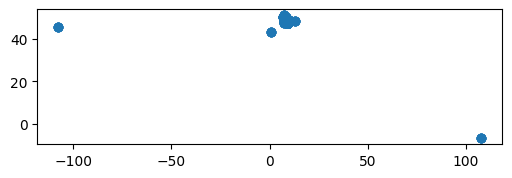

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

geocoded.plot(figsize=(6, 6), )
plt.show()